# 02. Neural netowrk classification with pytorch

classification is a problem fo predicting whether something is one thing or another

In [ ]:
## 1. Data / make classification data and get it ready

import sklearn

from sklearn.datasets import make_circles

# make 1000 samples

n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [ ]:
# make df of circle data
import pandas as pd

circle_df = pd.DataFrame({"X1": X[:, 0],
                          "X2": X[:, 1],
                          "label": y
                          })

In [ ]:
circle_df.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


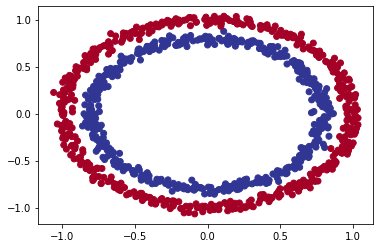

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

### Note the data we're workign with is often referred to as a toy dataset, a dataset that is small enough to experiment

### 1.1 Check input and output shapes


In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first exmaple of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one smaple of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one smaple of X: (2,) and the same for y: ()


### Turn data into tensors and create train and test splits


In [ ]:
import torch

torch.__version__

'1.13.0+cu116'

In [ ]:
X = torch.from_numpy(X).type(torch.float32)
y= torch.from_numpy(y).type(torch.float32)

In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

In [ ]:
# split into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, # 20% of data will be test
                                                    random_state=42
                                                    )

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. building a model

Lets build a modle to classify our blue and red dots

to do so, we want to:
1. setup device agnostic code so our code will run on an accelerator
2. construct a model
3. define a loss function and of
4. training loop

In [ ]:
import torch
from torch import nn

# make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [ ]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. create 2 nn.linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  # 3 define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer1 -> layer2 -> output

  # 4. instantiate an instance of our model calss and send it to the target device

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Lets replicate the model above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# class CircleModelV0(nn.Module):
#   def __init__(self):
#     super().__init__()
#     # 2. create 2 nn.linear layers capable of handling the shapes of our data
#     # self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features
#     # self.layer_2 = nn.Linear(in_features=5, out_features=1)
#     self.two_linear_layers = nn.Sequential(
#         nn.Linear(in_features = 2, out_features=5),
#         nn.Linear(in_features=5, out_features=1)
#     )

#   # 3 define a forward() method that outlines the forward pass
#   def forward(self, x):
#     # return self.layer_2(self.layer_1(x)) # x -> layer1 -> layer2 -> output
#     return self.two_linear_layers(x)

#   # 4. instantiate an instance of our model calss and send it to the target device

# model_0 = CircleModelV0().to(device)
# model_0

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
# make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 setup loss function and optimizer

which loss function or optimizer should you use

problem split
for example for regresssion you might want MAE or MSE (mean absolute error or mean sqaured erorr)
for classification you want binary cross entropy or categorical cross entropy


for optimizers: SGD or ADAM

In [ ]:
# Setup the loss function
# loss_fn = nn.BCELoss() - requires that data has gone through sigmoid activation fucntion before
loss_fn = nn.BCEWithLogitsLoss() # has the sigmoid activation function

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [ ]:
# calculate the accuracy - out of 100 examples, what percentages does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc



## 3. Train model

To train our model, we're going to need to build a training loop

1. forward pass
2. calculate the loss
3. optimizer zero grad
4. loss backward
5. optimizer


### 3.1 Going from raw logits -> prediction probabilities -> predictions labels

our model outputs are going to be raw logits

we can conver these logits into prediction probabilities by passing them to some kind of activation function sigmoid for binary classification and softmax for multiclass classification


then we can convert our models prediction probabilities to prediction labels by either rounding the or taking the argmax()

In [ ]:
# view the first 5 outputs on the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# use the sigmoid activation function on our model logits to turn them into prediction probabilities

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

In [ ]:
y_preds = torch.round(y_pred_probs)

# in full (logits -> pred probs -> pred labels)
with torch.inference_mode():
  y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze())) # get rid of other direction

y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

for our prediction probability values, we need to perform a range-style rounding on them

y_pred_probs >= 0.5, y=1 (class 1)
y_pred_probs < 0.5, y=0 (class 0)

## 3.2 building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

# put data to target device

X_train, y_train = X_train.to(device), y_train.to(device)

X_teset, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  #1. forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits - > pred probs -> pred labels


  # loss = loss_fn(torch.sigmoid(y_logits), y_train) ## if we are using nn.BCELoss
  loss = loss_fn(y_logits, ## nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # optimizer zero grad
  optimizer.zero_grad()
  # loss backward (backpropagation)
  loss.backward()
  # optimizer step
  optimizer.step()

  ### testing

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test.to(device)).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))


    # 2. calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # print whats happening

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.69796 | Acc: 51.88% | Test Loss: 0.69440 | Test acc: 58.00%
Epoch: 10 | Loss: 0.69590 | Acc: 51.25% | Test Loss: 0.69305 | Test acc: 53.00%
Epoch: 20 | Loss: 0.69490 | Acc: 51.62% | Test Loss: 0.69254 | Test acc: 49.50%
Epoch: 30 | Loss: 0.69435 | Acc: 51.12% | Test Loss: 0.69236 | Test acc: 49.50%
Epoch: 40 | Loss: 0.69401 | Acc: 50.88% | Test Loss: 0.69232 | Test acc: 51.00%
Epoch: 50 | Loss: 0.69378 | Acc: 50.25% | Test Loss: 0.69234 | Test acc: 50.00%
Epoch: 60 | Loss: 0.69362 | Acc: 50.00% | Test Loss: 0.69239 | Test acc: 51.50%
Epoch: 70 | Loss: 0.69351 | Acc: 50.25% | Test Loss: 0.69246 | Test acc: 51.00%
Epoch: 80 | Loss: 0.69342 | Acc: 49.88% | Test Loss: 0.69254 | Test acc: 50.00%
Epoch: 90 | Loss: 0.69336 | Acc: 49.88% | Test Loss: 0.69262 | Test acc: 53.00%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isnt learning anything
so to inspect it lets make some predictions and make them visual
visualize visualize visualize

In [ ]:
import requests

from pathlib import Path
# download helper functions from learn pytorch repo

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


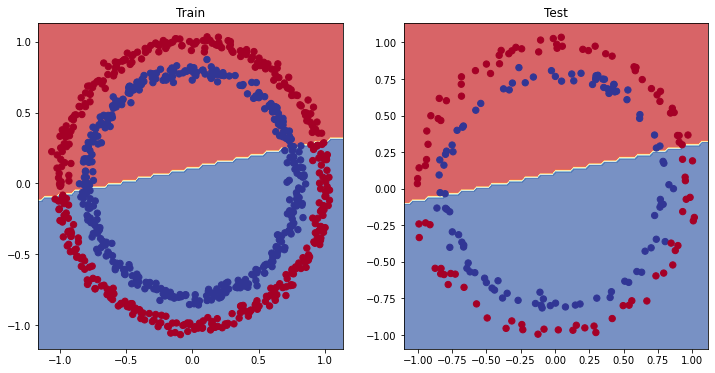

In [ ]:
# plot decison boundary of the model

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# 5 improving a model (from a model perspective)

1. add more layers - give the model more chances to learn about patterns in the data
2. add more hidden units - fo from 5 hidden units to 10 hidden units
3. fit for longer
4. changing the activation functions
5. change the learning rate
6. change the loss function


these changes deal with the model



In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed up

model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# create a loss function

loss_fn = nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [ ]:
def change_device(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
  return X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train, X_test, y_test = change_device()

epochs = 1000


for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")





Epoch: 0 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test acc: 51.00%
Epoch: 100 | Loss: 0.69369 | Acc: 50.25% | Test Loss: 0.69269 | Test acc: 50.00%
Epoch: 200 | Loss: 0.69351 | Acc: 50.12% | Test Loss: 0.69282 | Test acc: 49.50%
Epoch: 300 | Loss: 0.69339 | Acc: 50.50% | Test Loss: 0.69295 | Test acc: 49.00%
Epoch: 400 | Loss: 0.69329 | Acc: 50.38% | Test Loss: 0.69309 | Test acc: 48.50%
Epoch: 500 | Loss: 0.69322 | Acc: 49.88% | Test Loss: 0.69322 | Test acc: 49.50%
Epoch: 600 | Loss: 0.69317 | Acc: 49.50% | Test Loss: 0.69335 | Test acc: 53.00%
Epoch: 700 | Loss: 0.69313 | Acc: 49.38% | Test Loss: 0.69347 | Test acc: 50.50%
Epoch: 800 | Loss: 0.69309 | Acc: 50.00% | Test Loss: 0.69358 | Test acc: 51.00%
Epoch: 900 | Loss: 0.69307 | Acc: 50.62% | Test Loss: 0.69368 | Test acc: 47.50%


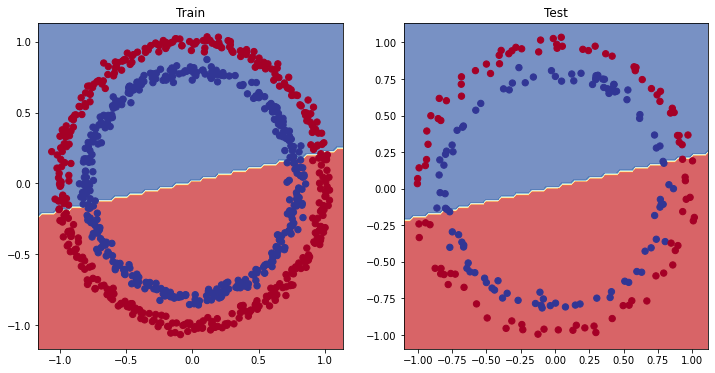

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### Preparing data to see if our model can fit a straight line

troubleshoot a larger problem by testing out a smaller problem


In [ ]:
# Create some data (same as ntoebook 1)

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]


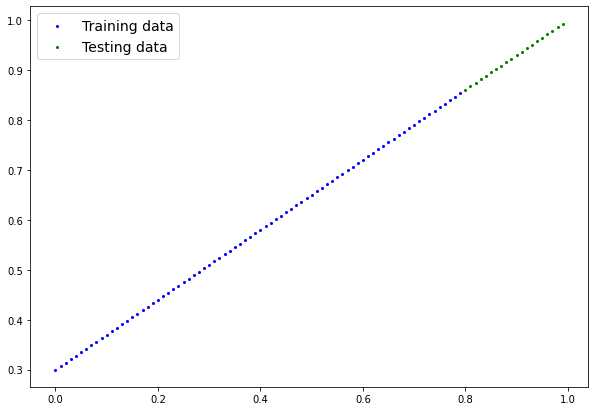

In [ ]:
plot_predictions(train_data=X_train_regression,
                train_labels=y_train_regression,
                test_data=X_test_regression,
                test_labels=y_test_regression)

In [ ]:
### 5.2 adjusting model_1 to fit a straight line
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# loss and optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr=0.001)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train_regression, y_train_regression, X_test_regression, y_test_regression = change_device(
X_train_regression, y_train_regression, X_test_regression, y_test_regression)
epochs = 1000

for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | Test Loss: 0.94965
Epoch: 100 | Loss: 0.40272 | Test Loss: 0.54029
Epoch: 200 | Loss: 0.05876 | Test Loss: 0.13480
Epoch: 300 | Loss: 0.01461 | Test Loss: 0.03342
Epoch: 400 | Loss: 0.00308 | Test Loss: 0.00008
Epoch: 500 | Loss: 0.00309 | Test Loss: 0.00012
Epoch: 600 | Loss: 0.00309 | Test Loss: 0.00018
Epoch: 700 | Loss: 0.00299 | Test Loss: 0.00011
Epoch: 800 | Loss: 0.00299 | Test Loss: 0.00016
Epoch: 900 | Loss: 0.00289 | Test Loss: 0.00011


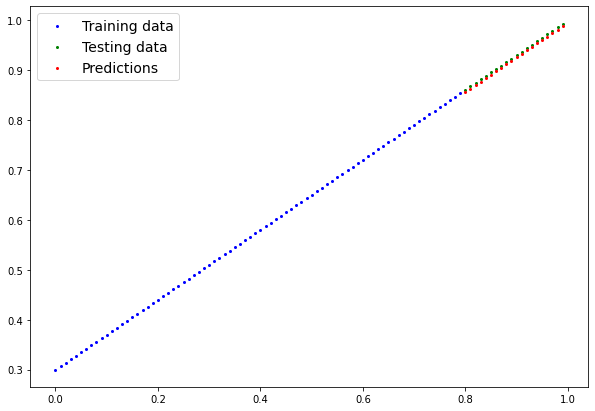

In [ ]:
model_2.eval()
with torch.inference_mode():
  y_pred = model_2(X_test_regression)

plot_predictions(predictions=y_pred.cpu(),
                train_data=X_train_regression.cpu(),
                train_labels=y_train_regression.cpu(),
                test_data=X_test_regression.cpu(),
                test_labels=y_test_regression.cpu())

## non-linearity

what pattens could you draw if you were given an infinte amount of a straight and non-straight lines

or in machine learning terms an infinite of linear and non-linear functions


### 6.1 Recreating non-linear data (red and blue circles)


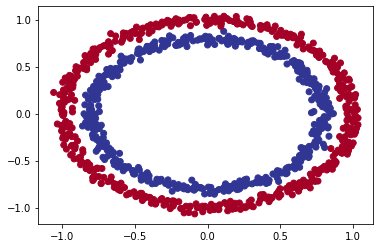

In [ ]:
import matplotlib.pyplot as pandas
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# convert data to tensors -> train and test splits

import torch
from sklearn.model_selection import train_test_split
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)


# split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

## 6.2 Building a model with non-linearity


linear - straight lines
non-linear = non-straight lines

artificial neural netowroks are a large tcombination of linear and non_straight fucntion which are potentially able to find patterns in data


In [ ]:
# building a model with non-linear functions

from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # non-linear activation functions


  def forward(self, x):
    # where should we put our non-linear activation fucntions
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.01)



## training a model with non-linearity


In [ ]:
torch.manual_seed(42)

torch.cuda.manual_seed(42)

X_train, y_train, X_test, y_test = change_device(X_train, y_train, X_test, y_test)

# loop through data

epochs = 1000

for epoch in range(epochs):
  model_3.train()

  # 1. forward pass

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ## test
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69295 | Acc: 50.00% | Test Loss: 0.69325 | Test acc: 50.00%
Epoch: 100 | Loss: 0.69248 | Acc: 50.38% | Test Loss: 0.69264 | Test acc: 50.00%
Epoch: 200 | Loss: 0.69225 | Acc: 59.00% | Test Loss: 0.69233 | Test acc: 56.00%
Epoch: 300 | Loss: 0.69209 | Acc: 70.12% | Test Loss: 0.69214 | Test acc: 67.00%
Epoch: 400 | Loss: 0.69195 | Acc: 68.38% | Test Loss: 0.69197 | Test acc: 70.00%
Epoch: 500 | Loss: 0.69181 | Acc: 58.50% | Test Loss: 0.69179 | Test acc: 62.00%
Epoch: 600 | Loss: 0.69168 | Acc: 54.00% | Test Loss: 0.69163 | Test acc: 56.00%
Epoch: 700 | Loss: 0.69155 | Acc: 53.25% | Test Loss: 0.69148 | Test acc: 53.00%
Epoch: 800 | Loss: 0.69141 | Acc: 52.62% | Test Loss: 0.69133 | Test acc: 53.00%
Epoch: 900 | Loss: 0.69128 | Acc: 52.75% | Test Loss: 0.69118 | Test acc: 53.00%


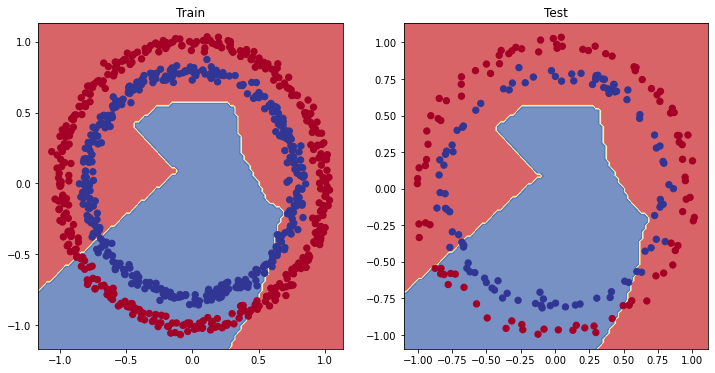

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_test_logits = model_3(X_test).squeeze()
  y_pred = torch.round(torch.sigmoid(y_test_logits))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replicating non-linear activation functions

neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data nad it tries to figre out the pattern on its own

and these tools are linear and non-linear functions

In [ ]:
# Create a tensor

A = torch.arange(-10, 10, 1, dtype=torch.float32)

A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

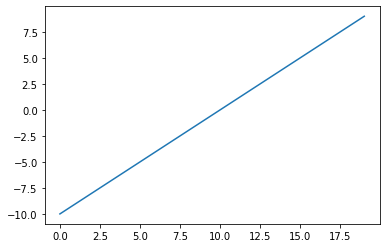

In [ ]:
# visualize the data
plt.plot(A)

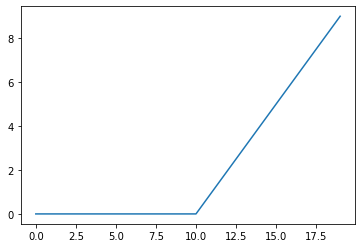

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x:torch.Tensor) -> torch.Tensor:
  return torch.max(torch.tensor(0), x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

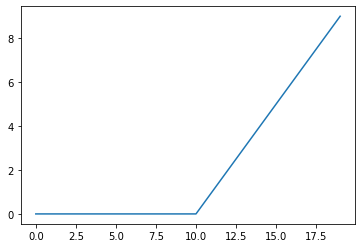

In [ ]:
# plot relu function
plt.plot(relu(A))

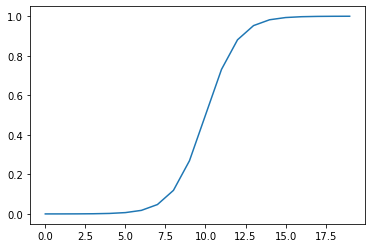

In [ ]:
def sigmoid(X:torch.Tensor) -> torch.Tensor:
  return 1 / (1 + torch.exp(-A))

plt.plot(sigmoid(X))

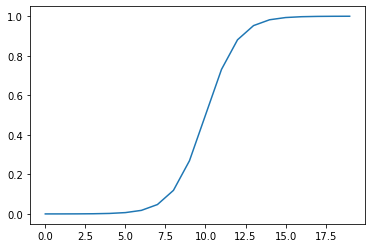

In [ ]:
plt.plot(torch.sigmoid(A))

## Putting it all together with a multi-class classification problem

* binary classification = one thing or another
* multi-class classification - multiple classes

In [ ]:
## 8.1 creating a topy multi-clas dataset

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# set the hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
# 1. create multi-class data

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)
# turn data into tensors

X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

In [ ]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

In [ ]:
y_blob

tensor([3, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 0, 2, 2, 2, 0, 0, 0, 1, 1, 3, 3, 3,
        1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 3, 2, 1, 3, 3, 1, 2, 1, 3, 1, 3, 0, 1,
        3, 1, 2, 0, 1, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2, 3, 1, 0, 2, 2, 1, 0, 3, 0,
        1, 2, 1, 3, 1, 0, 1, 0, 2, 0, 0, 0, 1, 3, 2, 2, 0, 0, 0, 0, 1, 1, 3, 1,
        3, 0, 1, 2, 1, 3, 3, 0, 3, 1, 1, 0, 2, 0, 3, 2, 1, 1, 1, 1, 2, 3, 2, 1,
        0, 2, 3, 1, 3, 2, 1, 3, 2, 1, 0, 2, 1, 3, 1, 3, 0, 2, 1, 1, 0, 0, 3, 3,
        3, 1, 1, 0, 0, 0, 0, 3, 2, 2, 0, 1, 0, 1, 1, 3, 2, 0, 1, 2, 0, 0, 1, 2,
        3, 2, 1, 0, 0, 1, 0, 3, 2, 3, 2, 3, 1, 1, 0, 2, 0, 2, 1, 3, 0, 2, 1, 0,
        1, 1, 0, 3, 2, 2, 2, 3, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 3, 2, 2, 1, 0,
        2, 0, 3, 1, 3, 3, 2, 0, 3, 0, 1, 2, 2, 0, 0, 2, 0, 3, 2, 2, 3, 2, 2, 1,
        2, 3, 2, 1, 3, 0, 1, 0, 1, 1, 1, 1, 3, 1, 1, 2, 0, 2, 2, 1, 1, 1, 3, 1,
        3, 3, 2, 1, 0, 3, 1, 0, 1, 2, 0, 3, 1, 3, 2, 1, 3, 2, 3, 1, 2, 0, 0, 2,
        0, 3, 3, 0, 2, 2, 2, 0, 2, 2, 2,

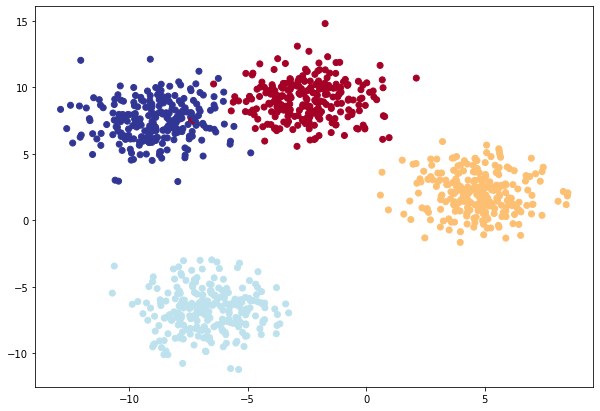

In [ ]:
# plot data

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:,0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [ ]:
# 8.2 multiclass classification model in pytorch

## create device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [ ]:
# build a multi-class classification model

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ Initializes multi-class classification model

    Args:
      input_features(int): Number of input features to the model
      output_features(int): Number of output features(number of output classes)
      hidden_units(int): Nuber of hidden units between layers, default 8
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2,
                       output_features=4, # same as the number of classes
                       hidden_units=8).to(device)


In [ ]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [ ]:
### 8.4 Create a loss function and an optimizer for a multi-class classficiation model
# we need to convert our models outputs (logits) to prediction probabilities and then to prediction labels
loss_fn = nn.CrossEntropyLoss()

# create an optimizer

optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

### 8.4 getting prediction probabilities for a multi-class pytorch model
## get the logits
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device).type(torch.float32))

y_logits[:10]


tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
# Convert our models logits outputs to prediction probabilities

y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])


tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [ ]:
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

In [ ]:
torch.max(y_pred_probs[0])

tensor(0.3244, device='cuda:0')

In [ ]:
# convert our model's prediction probabilities to prediction labels

y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [ ]:
### 8.5 Creating a training loop and testing loop fior a multi-class pytorch model

# fit the multi-class model to the data

torch.manual_seed(42)

torch.cuda.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train, X_blob_test, y_blob_test = change_device(X_blob_train, y_blob_train, X_blob_test, y_blob_test)


for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)

  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## test

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 1.15883 | Acc: 40.38% | Test Loss: 1.07554 | Test acc: 48.00%
Epoch: 10 | Loss: 0.64476 | Acc: 96.75% | Test Loss: 0.66069 | Test acc: 97.50%
Epoch: 20 | Loss: 0.42535 | Acc: 98.50% | Test Loss: 0.43074 | Test acc: 100.00%
Epoch: 30 | Loss: 0.25294 | Acc: 99.12% | Test Loss: 0.24508 | Test acc: 99.50%
Epoch: 40 | Loss: 0.11232 | Acc: 99.25% | Test Loss: 0.10229 | Test acc: 99.50%
Epoch: 50 | Loss: 0.06627 | Acc: 99.25% | Test Loss: 0.05848 | Test acc: 99.50%
Epoch: 60 | Loss: 0.05068 | Acc: 99.25% | Test Loss: 0.04293 | Test acc: 99.50%
Epoch: 70 | Loss: 0.04300 | Acc: 99.25% | Test Loss: 0.03491 | Test acc: 99.50%
Epoch: 80 | Loss: 0.03836 | Acc: 99.25% | Test Loss: 0.02988 | Test acc: 99.50%
Epoch: 90 | Loss: 0.03525 | Acc: 99.25% | Test Loss: 0.02663 | Test acc: 99.50%


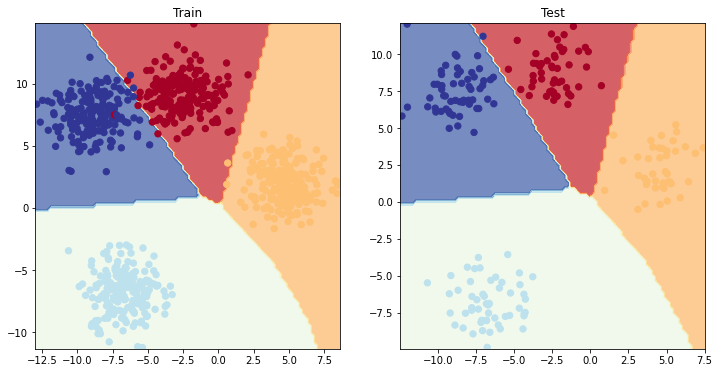

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [ ]:
### making 8.6 making and evaling predictions with a pytorch multi-class model

model_4.eval()
with torch.inference_mode():
  model_4.to(device)
  y_logits = model_4(X_blob_test)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)


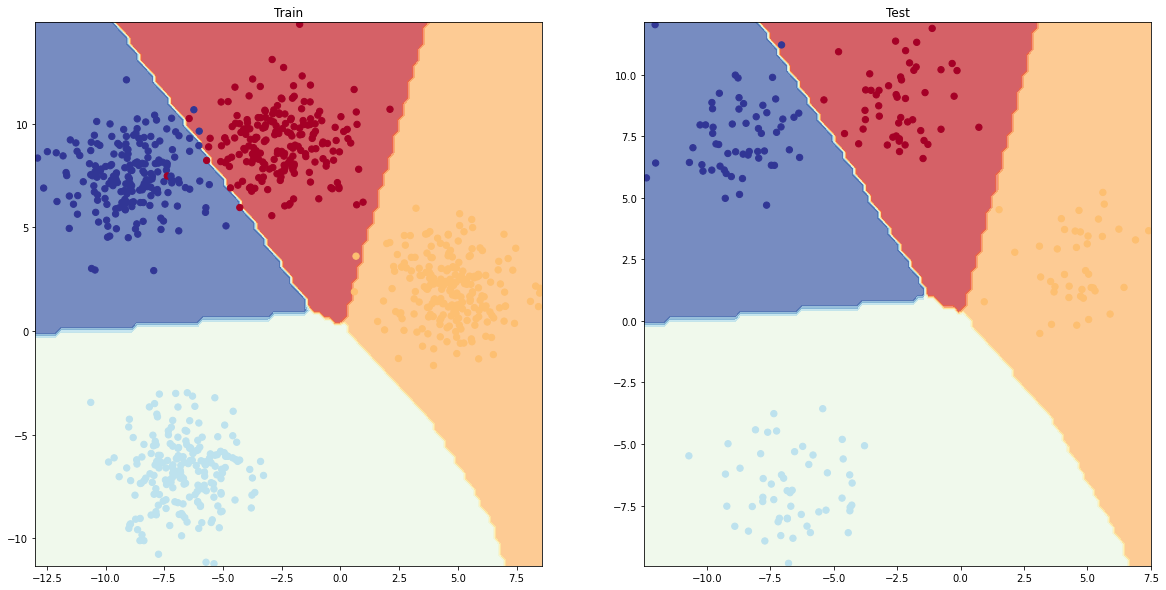

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [ ]:
# build a multi-class classification model

class BlobModelV1(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ Initializes multi-class classification model

    Args:
      input_features(int): Number of input features to the model
      output_features(int): Number of output features(number of output classes)
      hidden_units(int): Nuber of hidden units between layers, default 8
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

### you can get rid of the ReLU because the data for this system is linearly separable

# model_4 = BlobModel(input_features=2,
#                        output_features=4, # same as the number of classes
#                        hidden_units=8).to(device)



## A few more classification metrics (to evaluate our classification model)

* Accuracy - out of 100 samples how many does it get right
  1. not the best for unbalanced classes
* Precision
  1. good for unbalanced classes
* Recall
  1. good for unbalanced classes
* F1-score
* Confusion matrix
* classification report


use `TorchMetrics`

In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchmetrics import Accuracy

# setup metric

torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# calculate accuracy

torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

In [ ]:
# https://torchmetrics.readthedocs.io/en/latest/